# Máquinas de Aprendizaje - Tarea 2

#### Adrien Juraver - Diego Pérez

## 1) Reducción de dimensionalidad para Clasificación

La reducción de dimensionalidad es importante en análisis de datos, ya que no solo permite visualizar y explorar los datos a nuestra disposición, sino que también reducir el costo computacional de procesarlos.

Para esta sección, se trabajará con una colección de sonidos fonéticos, representados en un espacio de $d = 10$ características, que deben ser identificados como vocales del inglés británico. El dataset consiste de 528 datos de entrenamiento y 462 de prueba, y se encuentra disponible en el sitio web de los autores del libro guía (ESL). El mejor desempeño reportado es de 56% *accuracy*, con un modelo de vecinos más cercanos y red neuronal de radio basal.

### a) Dataframe

Utilizando la librería *urllib*, se descarga el dataset del sitio web indicado, para luego construir el dataframe con la librería *pandas*.

In [1]:
import urllib.request as urllib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [3]:
train_df.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,6.000000,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568
std,3.165277,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317
min,1.000000,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000
25%,3.000000,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000
50%,6.000000,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500
75%,9.000000,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000
max,11.000000,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000


In [5]:
test_df.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,6.000000,-3.246078,2.049102,-0.576076,0.504626,-0.210089,0.681998,-0.029327,0.244162,-0.342820,-0.056221
std,3.165706,0.753377,1.170402,0.671069,0.748236,0.578353,0.544476,0.440483,0.532523,0.505557,0.650602
min,1.000000,-4.982000,-1.074000,-2.091000,-1.044000,-1.733000,-0.405000,-1.282000,-0.949000,-1.409000,-1.241000
25%,3.000000,-3.855750,1.194000,-1.037000,-0.049250,-0.612000,0.278250,-0.310250,-0.167750,-0.721750,-0.564500
50%,6.000000,-3.220000,2.101500,-0.621000,0.418500,-0.181500,0.593000,0.005500,0.245000,-0.358000,-0.257500
75%,9.000000,-2.706500,2.985000,-0.181000,0.960750,0.199000,1.038500,0.245750,0.651500,0.019500,0.594750
max,11.000000,-1.093000,4.314000,1.431000,2.377000,1.114000,2.108000,1.209000,2.039000,0.757000,1.294000


El dataset ya se encuentra particiondo en conjuntos de entrenamiento y de pruebas, de 528 y 462 entradas respectivamente. Los datos se representan en un espacio de $d = 10$ características, que por los valores de la tabla anterior, se sabe que no están estandarizados. Las etiquetas para las clases son $\{1,2,..,11\}$. 

A continuación se grafican los histogramas para cada característica y las etiquetas del conjunto de entrenamiento.

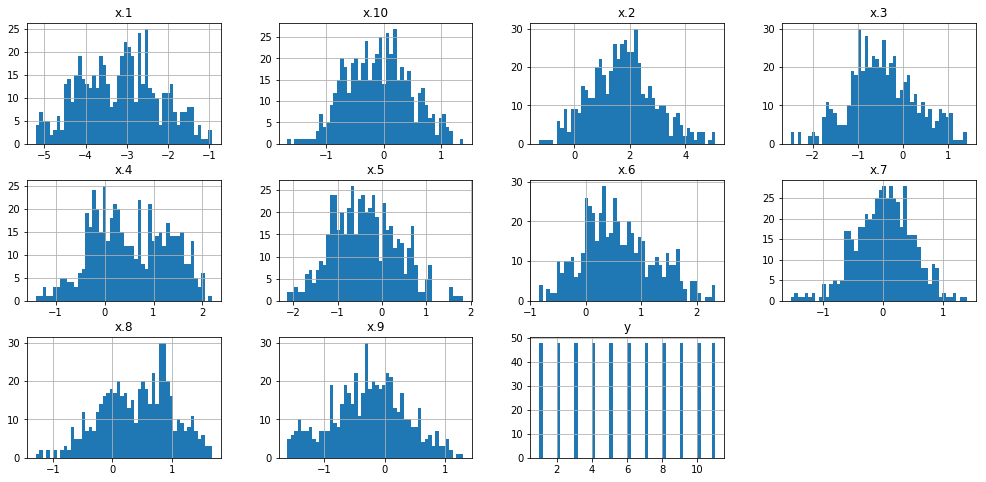

In [4]:
train_df.hist(layout=(3,4), figsize=(17,8), bins=50)
plt.show()

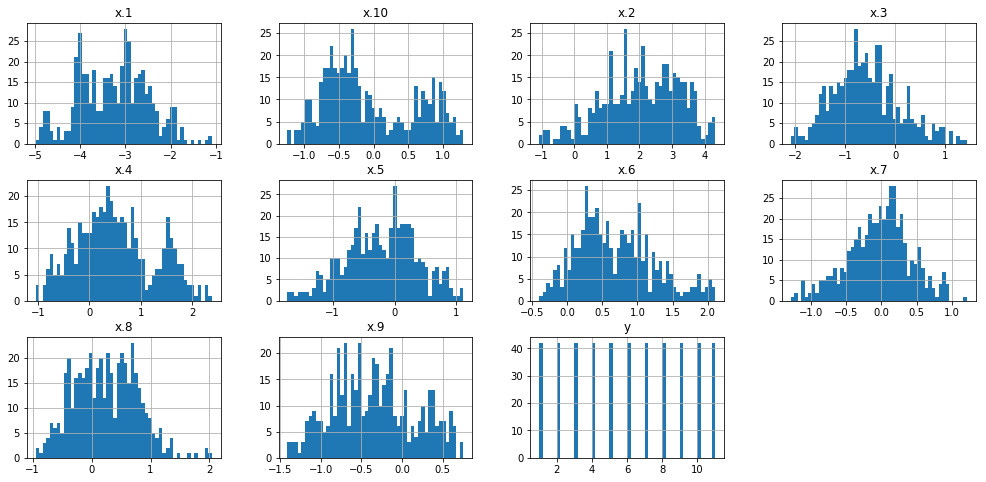

In [6]:
test_df.hist(layout=(3,4), figsize=(17,8), bins=50)
plt.show()

La observación más importante es que las clases están balanceadas, con 48 datos cada una en el conjunto de entrenamiento, y 42 en el de pruebas.

### b) Estandarizar

Se construyen matrices X e y, para luego estandarizar usando el *StandardScaler* de la librería *sklearn* .

In [10]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

X = train_df.loc[:,'x.1':'x.10'].values
y = train_df.loc[:,'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)

### c) PCA - 2D

Se utiliza PCA para obtener una representación en 2 características, de las 10 originales. Se grafica el dataset en las dos componentes principales, codificando por color las distintas clases.

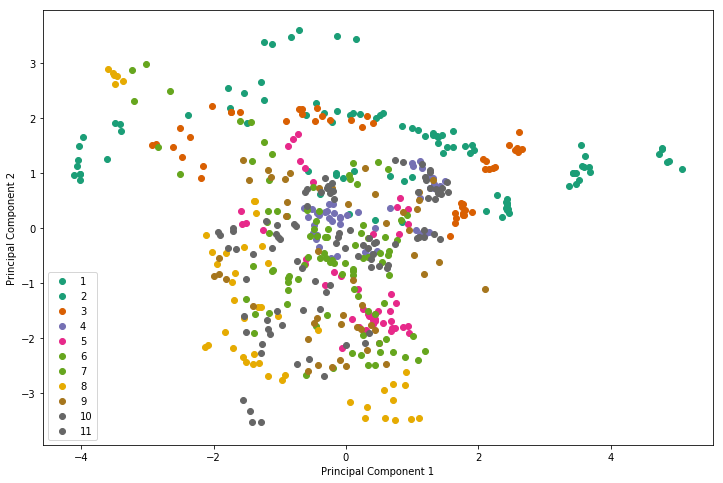

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Dark2')
mclasses= np.arange(y.min(), y.max() + 1)
mcolors = np.array([cmap(i) for i in np.linspace(0,1,mclasses.size)])
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(fancybox=True)
plt.show()

### d) LDA - 2D

Se realiza el mismo procedimiento que en c), pero esta vez usando LDA, graficando el dataset para los dos discriminantes.

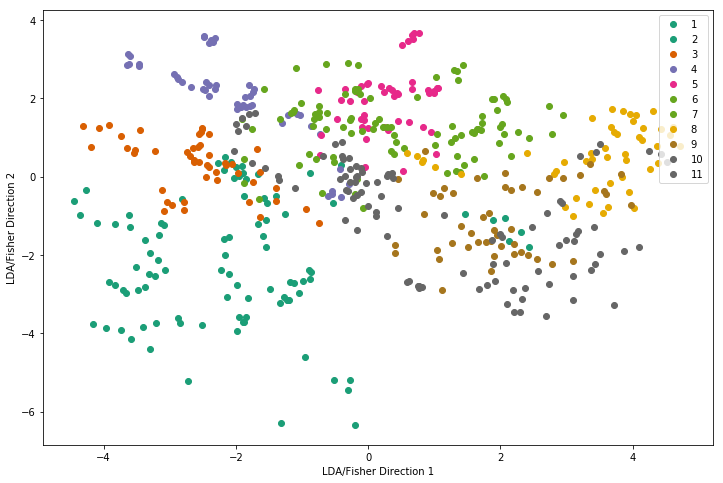

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Dark2')
mclasses= np.arange(y.min(), y.max() + 1)
mcolors = np.array([cmap(i) for i in np.linspace(0,1,mclasses.size)])
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

### e) PCA vs LDA

PCA es una técnica de transformación lineal no supervisada, que busca las direcciones de máxima varianza para el conjunto completo. En cambio LDA es supervisada, particiona el el conjunto según las clases, y busca el subespacio de atributos que maximiza la separabilidad de las clases.

Se puede observar en c) y d) que usando LDA se distinguen las clases con mayor claridad que con PCA. Si bien en ámbos casos el problema no es linealmente separable, LDA obtiene mejores resultados.

### f) Clasificador Pibarra

Se debe construir un clasificador que determine la clase de un dato x de forma aleatoria, considerando solo la probabilidad *a-priori* $p(y=k)$ de cada clase. Si se lleva al contexto de un clasificador bayesiano ingenuo, donde $p(C_k \mid x) = \frac{p(C_k) p(x \mid C_k)}{p(x)}$, lo que se pide es $p(C_k\mid x) = p(C_k)$. Para el dataset de las vocales, las clases están balanceadas por lo que $y$ sigue una distribución uniforme, pero se implementa el caso general.

In [23]:
class PibarraClassifier():
    p = []
    classes = []
    
    def train(self, X, y):
        y = np.array(y)
        self.classes = np.sort(np.unique(y))
        self.p = np.zeros(self.classes.size)
        i = 0
        for k in self.classes:
            self.p[i] = y[y==k].size/y.size
            i += 1
    
    def predict(self, X):
        return np.random.choice(self.classes, X.shape[0], p=self.p)

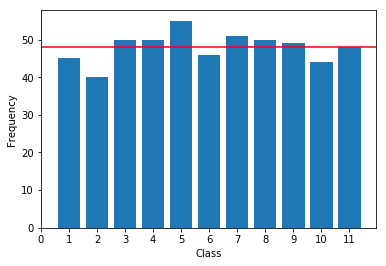

In [28]:
model = PibarraClassifier()
model.train(X_std, y)
y_hat = model.predict(X_std)

import scipy.stats as stats
f, ax = plt.subplots(1)
fq = stats.itemfreq(y_hat)
ax.bar(fq[:,0], fq[:,1])
ax.set_xticks(np.arange(0,12))
ax.axhline(y=fq[:,1].mean(), xmin=0, xmax=12, color="r")
ax.set_ylabel("Frequency")
ax.set_xlabel("Class")

Sobre el conjunto de entrenamiento, el clasificador etiqueta aleatoriamente los datos, según la probabilidad *a-priori* de cada clase. El valor teórico es 48 para cada clase (línea roja en el histograma), pero como se trata de una muestra aleatoria, las frecuencias varían.

### g) LDA vs PCA vs kNN

Se compara el desempeño de LDA, QDA y un modelo kNN como clasificadores, sin reducir dimensionalidad. Se compara también el desempeño de kNN para distintos valores de k, que controla cuántos vecinos más cercanos se consultarán para definir la clase de un dato.

-----LDA-----
0.683712121212
0.443722943723
-----QDA-----
0.988636363636
0.471861471861
-----KNN-----


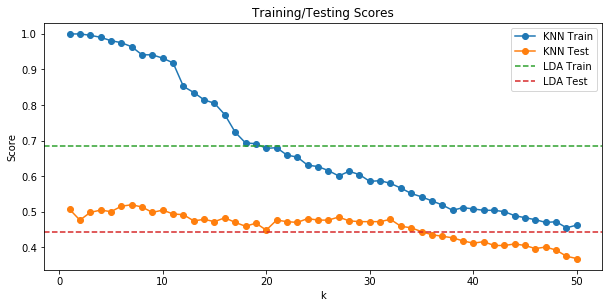

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

Xtest = test_df.loc[:,'x.1':'x.10'].values
ytest = test_df.loc[:,'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print("-----LDA-----")
print(lda_model.score(X_std,y))
print(lda_model.score(X_std_test,ytest))
qda_model = QDA()
qda_model.fit(X_std,y)
print("-----QDA-----")
print(qda_model.score(X_std,y))
print(qda_model.score(X_std_test,ytest))
print("-----KNN-----")
knn_scores_training = []
knn_scores_testing = []
k = range(1,51)
for c in k:
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_std,y)
    knn_scores_training.append(knn_model.score(X_std,y))
    knn_scores_testing.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(10,10))
ax = plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing Scores")
ax.plot(k,knn_scores_training, '-o', label="KNN Train") 
ax.plot(k,knn_scores_testing, '-o', label="KNN Test")
ax.axhline(y=lda_model.score(X_std,y), label="LDA Train", linestyle="--", color="C2")
ax.axhline(y=lda_model.score(X_std_test,ytest), label="LDA Test", linestyle="--", color="C3")
plt.legend(loc = "upper right")
plt.show()

Se observa lo siguiente.

* QDA obtiene mucho mejor puntaje en el conjunto de entrenamiento que QDA.
* QDA obtiene mejor puntaje en el conjunto de pruebas que LDA, aunque la diferencia es poca.
* QDA presenta overfitting considerable en relación a LDA (puntaje en conjunto de entrenamiento vs pruebas).
* kNN se comporta similar a QDA para valores pequeños de k.
* kNN obtiene los mejores resultados para valores pequeños de k, obteniendo peores resultados que LDA para k mayor a 35 en el conjunto de pruebas.
* El overfitting en kNN se reduce en la medida que aumenta k.
* El mejor puntaje en general lo obtiene kNN para $k = 7$, cercano a $0.51$

### h) Reducción de dimensionalidad con PCA

Se utilizará PCA para reducir la dimensionalidad del dataset, para luego comparar la precisión de LDA, QDA y kNN. Se considerará $d' = 1,2,...,10$ y $k = 2$ para el modelo kNN.

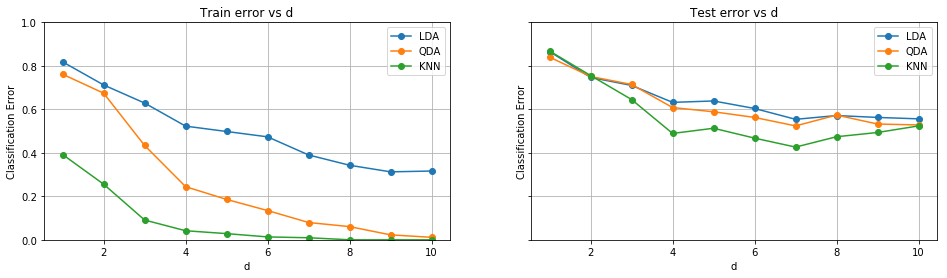

In [20]:
from scipy.metrics import accuracy_score

train_errors = []
test_errors = []
for d in range(1,11):
    pca = PCA(n_components=d)
    x_red_train = pca.fit_transform(X_std)
    x_red_test = pca.transform(X_std_test)
    lda_model = LDA()
    qda_model = QDA()
    knn_model = KNeighborsClassifier(n_neighbors=2)
    lda_model.fit(x_red_train, y)
    qda_model.fit(x_red_train, y)
    knn_model.fit(x_red_train, y)
    train_errors.append([1 - lda_model.score(x_red_train, y), 
                         1 - qda_model.score(x_red_train, y), 
                         1 - knn_model.score(x_red_train, y)])
    test_errors.append([1 - lda_model.score(x_red_test, ytest), 
                         1 - qda_model.score(x_red_test, ytest), 
                         1 - knn_model.score(x_red_test, ytest)])
f, axes = plt.subplots(1, 2, sharey=True)
f.set_size_inches(16,4)
axes[0].plot(np.arange(1,11), train_errors, '-o')
axes[0].grid(True)
axes[0].set_ylim([0,1])
axes[0].set_xlabel("d")
axes[0].set_ylabel("Classification Error")
axes[0].set_title("Train error vs d")
axes[0].legend(["LDA", "QDA", "KNN"])
axes[1].plot(np.arange(1,11), test_errors, '-o')
axes[1].grid(True)
axes[1].legend(["LDA", "QDA", "KNN"])
axes[1].set_xlabel("d")
axes[1].set_ylabel("Classification Error")
axes[1].set_title("Test error vs d")

Se observa lo siguiente.

* Para ambos conjuntos, el error disminuye para mayores valores de $d$ (más dimensiones), hasta llegar a $d = 10$ donde los resultados son iguales a los de la sección anterior (sin reducción).
* kNN se obtiene mejores resultados sobre el conjunto de entrenamiento para todos los valores de $d$.
* El orden de desempeño se mantiene en el conjunto de entrenamiento, con LDA < QDA < kNN.
* kNN obtiene los mejores resultados en el conjunto de pruebas, con error cercano a $0.42$ para $d = 7$.

El mejor *trade-off* entre desempeño y tiempo de cómputo para el conjunto de pruebas es kNN con $d=4$. La tasa de disminución del error para kNN con $d$ entre 1 y 4 es mayor que para LDA y QDA. Luego todos se comportan similar. 

### i) Reducción de dimensionalidad con LDA

Se realiza el mismo ejercicio que en g), pero esta vez se utilizará LDA para hacer la reducción de dimensionalidad. Como se observó en las secciones c) y d), para dimesiones bajas, LDA obtiene mejores resultados separando las clases. Por lo tanto, se espera que la reducción del error de clasificación disminuya a una tasa mayor para $d$ pequeños, en comparación con PCA.

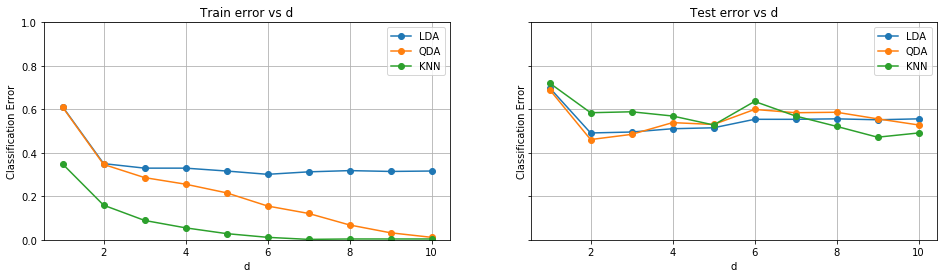

In [19]:
train_errors = []
test_errors = []
for d in range(1,11):
    lda = LDA(n_components=d)
    x_red_train = lda.fit_transform(X_std, y)
    x_red_test = lda.transform(X_std_test)
    lda_model = LDA()
    qda_model = QDA()
    knn_model = KNeighborsClassifier(n_neighbors=2)
    lda_model.fit(x_red_train, y)
    qda_model.fit(x_red_train, y)
    knn_model.fit(x_red_train, y)
    train_errors.append([1 - lda_model.score(x_red_train, y), 
                         1 - qda_model.score(x_red_train, y), 
                         1 - knn_model.score(x_red_train, y)])
    test_errors.append([1 - lda_model.score(x_red_test, ytest), 
                         1 - qda_model.score(x_red_test, ytest), 
                         1 - knn_model.score(x_red_test, ytest)])
f, axes = plt.subplots(1, 2, sharey=True)
f.set_size_inches(16,4)
axes[0].plot(np.arange(1,11), train_errors, '-o')
axes[0].grid(True)
axes[0].set_ylim([0,1])
axes[0].set_xlabel("d")
axes[0].set_ylabel("Classification Error")
axes[0].set_title("Train error vs d")
axes[0].legend(["LDA", "QDA", "KNN"])
axes[1].plot(np.arange(1,11), test_errors, '-o')
axes[1].grid(True)
axes[1].legend(["LDA", "QDA", "KNN"])
axes[1].set_xlabel("d")
axes[1].set_ylabel("Classification Error")
axes[1].set_title("Test error vs d")

Los resultados para ambos conjuntos y los tres tipos clasificadores son los mejores encontrados. A diferencia de la sección anterior, kNN no obtiene los mejores resultados para $d$ pequeños, sino que LDA y QDA. El mejor trade-off de desempeño vs tiempo de cómputo es para QDA con $d = 2$, en el conjunto de pruebas.

En ambos conjuntos se observa que para valores pequeños de $d$, el error es menor al obtenido con PCA. En el conjunto de entrenamiento, para $d = 2$ se obtiene buenos resultados, y los mejores siguen siendo para $d = 10$, es decir, sin reducción de dimensionalidad. No es el caso para el conjunto de pruebas, donde los resultados para $d = 2$ son mejores que para $d = 10$, lo que indica que, para este dataset, reducir la dimensionalidad buscando el subconjunto de atributos que maximizan la separación entre clases permite mejorar el desempeño de los clasificadores en mayor medida que las direcciones de máxima varianza (PCA).

## 3) Fraude en Transacciones Bancarias

En esta sección se utilizará un dataset de Kaggle, con transacciones bancarias. El desafío es que sus clases están desbalanceadas, para lo cual se usarán tres técnicas para enfrentar el problema. El total de transacciones es 284.807, de las cuales solo 492 fueron fraudulentas. 

### a) Desbalance de clases

Se descarga el dataset desde Kaggle, y se crea un dataframe usando *pandas*. Luego se grafica el histograma de las clases.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

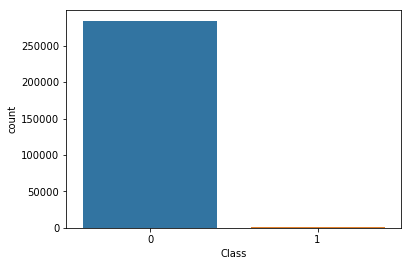

In [3]:
dt = pd.read_csv("creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

Se observa que la clase 1 (fraude) corresponde a menos del $0.1\%$ total de datos. El problema de las clases desbalnceadas es que la precisión del clasificador no representa qué tan bien se ajusta el modelo, si no que a la distribución de clases subyacente. Más adelante se usarán distintas técnicas para enfrentar este problema.

A continuación se explora el dataset y se grafican los histogramas correspondientes.

In [4]:
dt.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


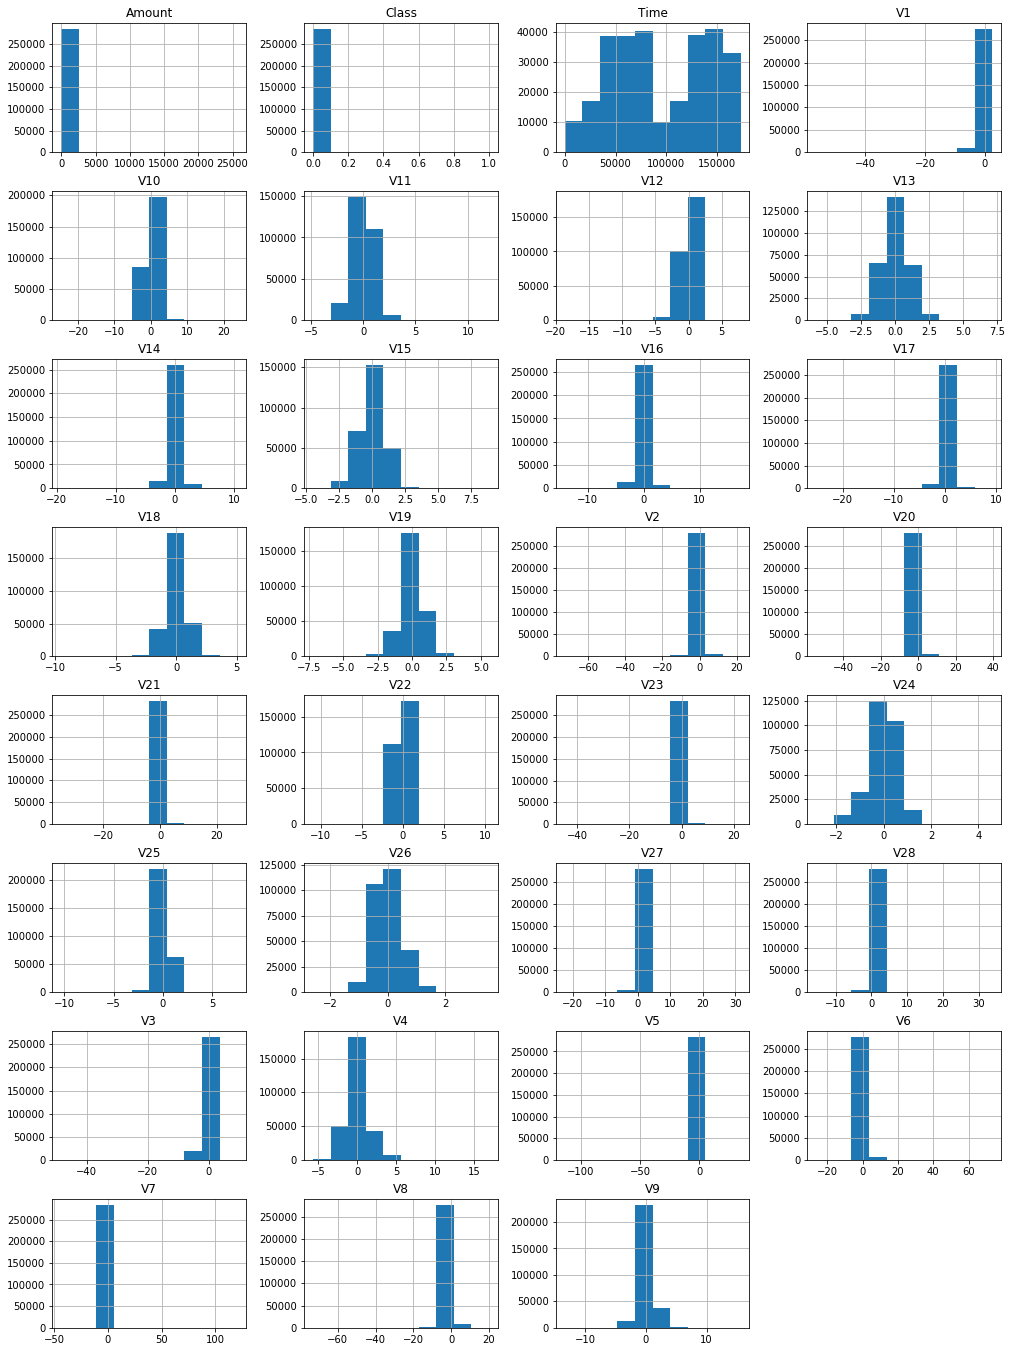

In [11]:
dt.hist(layout=(8,4), figsize=(17,24))
plt.show()

Se puede observar en la tabla e histogramas que el espacio de características esta centrado en cero. Esto ocurre porque cada característca corresponde a una transformación lineal por PCA de los datos reales, para sus 28 primeros componentes principales, enmascarando los datos reales (privacidad). 

### b) Estandarizar

El atributo *Amount*, según la tabla anterior, no se encuentra estandarizado, por lo que se usa el *StandardScaler* de *sklearn*. Además, se elimina el atributo *Time*, que no será usado en la clasificacion.

In [4]:
from sklearn.preprocessing import StandardScaler
dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
dt.drop(["Time","Amount"],axis=1,inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


El resultado es un conjunto con 29 atributos (28 de PCA más *Amount*) estandarizados, pero las clases siguen desbalanceadas. 

### c) Classification Report

La siguiente función recibe un modelo, datos de entrenamiento y datos de prueba, para luego mostrar la matriz de confusión y la curva ROC correspondientes. 

Una matriz de confusión permite visualizar el desempeño de un clasificador, en términos de los valores reales y aquellos predichos. Los distintos cuadrantes de la matriz indican la cantidad de falsos postivos, falsos negativos, y datos correctamente etiquetados. De la matriz de confusión se pueden calcular algunas métricas, como el recall, que mide la sensitividad,o la precisión, y ámbos en conjunto se usan para calcular el $F_1$ score.

La curva ROC es una representación grafica de la sensitividad vs la especificidad para un clasificador binario, según varía el umbral de discriminación. La relación con la matriz de confusión, es que se usan los valores VPR y FPR, o la razón de verdaderos positvos y razón de falsos positivos. La linea punteada en la curva ROC representa un clasificador aleatorio, y el caso ideal (precisión perfecta) es el punto superior izquierdo del gráfico.

In [5]:
from sklearn.metrics import roc_curve, auc

def model(model,features_train,features_test,labels_train,labels_test):
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    pred_proba = clf.decision_function(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("The recall for this model is: ", (float(cnf_matrix[1,1])/(cnf_matrix[1,1]+cnf_matrix[1,0])))
    f, axes = plt.subplots(1,2)
    f.set_size_inches(16,4)
    print("TP: ", cnf_matrix[1,1,])
    print("TN: ", cnf_matrix[0,0])
    print("FP: ", cnf_matrix[0,1])
    print("FN: ", cnf_matrix[1,0])
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5, ax = axes[0])
    axes[0].set_title("Confusion_matrix")
    axes[0].set_xlabel("Predicted_class")
    axes[0].set_ylabel("Real class")
    fpr, vpr, _ = roc_curve(labels_test, pred_proba, pos_label=1)
    roc_auc = auc(fpr, vpr)
    axes[1].plot(fpr, vpr, color="C1", label='ROC curve (area = %0.2f)' % roc_auc)
    axes[1].plot([0, 1], [0, 1], color='C2', linestyle='--')
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("VPR")
    axes[1].set_title("ROC Curve")
    axes[1].legend(loc="lower right")
    plt.show()
    print("\n----------Classification Report---------------------------------")
    print(classification_report(labels_test,pred))
    

### d) Dataset Split

La siguiente función particiona un dataset cualquiera en conjuntos de entrenamiento y de pruebas, a una razón de 7:3. El dataframe se separa en atributos y etiquetas, los que son particionados en la misma razón.

In [6]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
    print("Length of training data: ", len(x_train))
    print("Length of test data: ", len(x_test))
    return(x_train,x_test,y_train,y_test)

### e) Undersamplig

La primera técnica para enfrentar el desbalance de clases es undersamplig. En general, las técnicas que veremos buscan ajustar la distribución de clases del dataset. Undersampling y oversamplig usan un *bias* para seleccionar más muestras de una clase que de la otra. La siguiente función recibe el conjunto de datos y la razón de muestreo.

In [7]:
def undersample(data,times):
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    Normal_indices_undersample = np.array(np.random.choice(normal_indices, 
                                                           (times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    normal = (float(len(undersample_data[undersample_data.Class==0]))
              /len(undersample_data["Class"]))
    print("The normal transaction proportion is : ", normal)
    fraud = (float(len(undersample_data[undersample_data.Class==1])) 
             /len(undersample_data["Class"]))
    print("The fraud transaction proportion is : ", fraud)
    return(undersample_data)

### f) Regresión Logística y LDA

A continuación se utilizará regresión logística y luego LDA como clasificadores, utilizando las funciones definidas anteriormente para realizar undersampling en razones 1:1, 1:2 y 1:3.

Length of training data:  199364
Length of test data:  85443


The undersample data for 1 proportion

The normal transaction proportion is :  0.5
The fraud transaction proportion is :  0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data:  490
Length of test data:  210
The recall for this model is:  0.908256880734
TP:  99
TN:  99
FP:  2
FN:  10


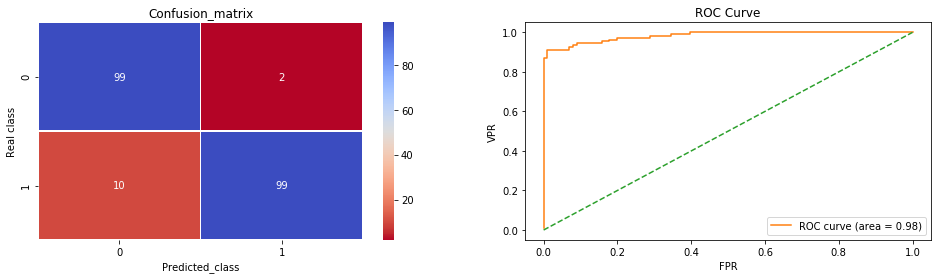


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.91      0.98      0.94       101
          1       0.98      0.91      0.94       109

avg / total       0.95      0.94      0.94       210

--------------------------Testing Set---------------------------
The recall for this model is:  0.901408450704
TP:  128
TN:  81012
FP:  4289
FN:  14


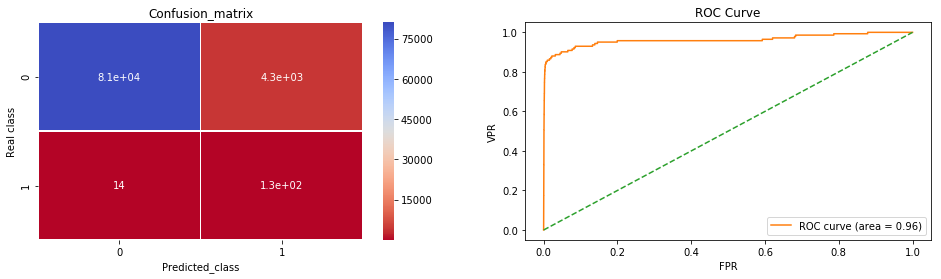


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.95      0.97     85301
          1       0.03      0.90      0.06       142

avg / total       1.00      0.95      0.97     85443



The undersample data for 2 proportion

The normal transaction proportion is :  0.6666666666666666
The fraud transaction proportion is :  0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data:  735
Length of test data:  315
The recall for this model is:  0.869158878505
TP:  93
TN:  204
FP:  4
FN:  14


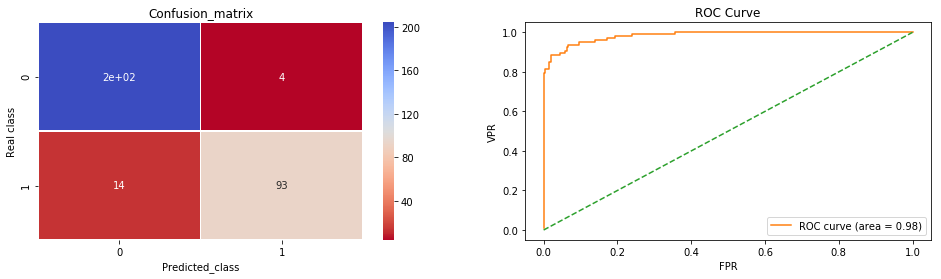


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       208
          1       0.96      0.87      0.91       107

avg / total       0.94      0.94      0.94       315

--------------------------Testing Set---------------------------
The recall for this model is:  0.859154929577
TP:  122
TN:  83750
FP:  1551
FN:  20


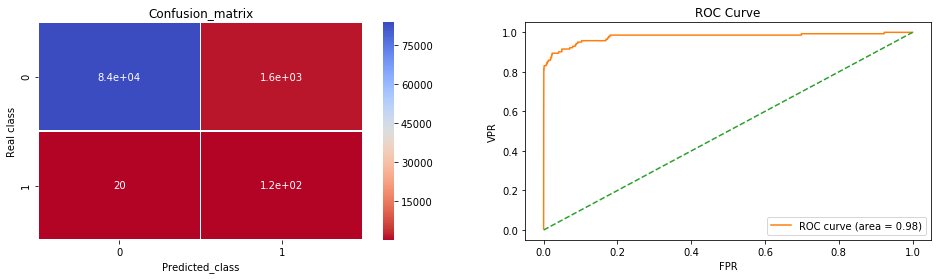


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85301
          1       0.07      0.86      0.13       142

avg / total       1.00      0.98      0.99     85443



The undersample data for 3 proportion

The normal transaction proportion is :  0.75
The fraud transaction proportion is :  0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data:  980
Length of test data:  420
The recall for this model is:  0.896907216495
TP:  87
TN:  315
FP:  8
FN:  10


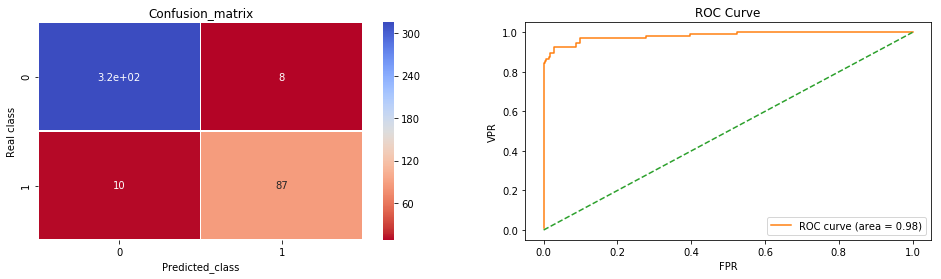


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       323
          1       0.92      0.90      0.91        97

avg / total       0.96      0.96      0.96       420

--------------------------Testing Set---------------------------
The recall for this model is:  0.859154929577
TP:  122
TN:  84009
FP:  1292
FN:  20


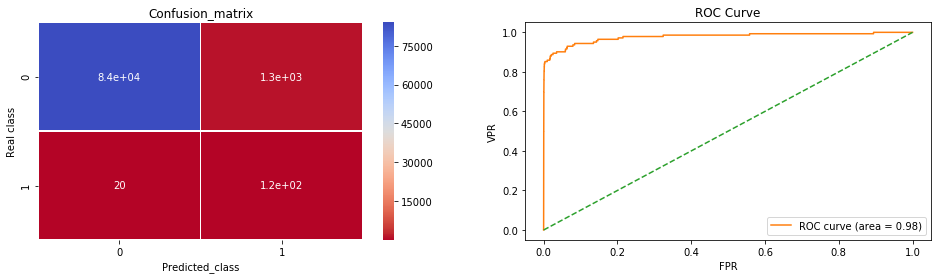


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85301
          1       0.09      0.86      0.16       142

avg / total       1.00      0.98      0.99     85443



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve, roc_auc_score,classification_report

x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print("================================================================\n\n")
    print("The undersample data for " + str(i) + " proportion\n")
    Undersample_data = undersample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,under_x,x_ts,under_yx,y_ts)

#### LDA

Se realiza el mismo ejercicio que antes, pero usando LDA como clasificador.

Length of training data:  199364
Length of test data:  85443


The undersample data for 1 proportion

The normal transaction proportion is :  0.5
The fraud transaction proportion is :  0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data:  477
Length of test data:  205
The recall for this model is:  0.798165137615
TP:  87
TN:  95
FP:  1
FN:  22


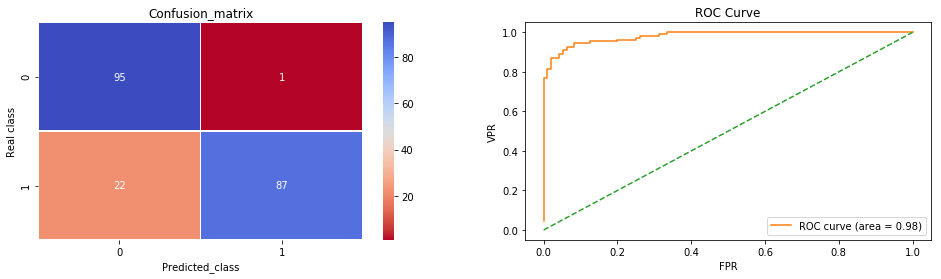


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.81      0.99      0.89        96
          1       0.99      0.80      0.88       109

avg / total       0.91      0.89      0.89       205

--------------------------Testing Set---------------------------
The recall for this model is:  0.841059602649
TP:  127
TN:  83815
FP:  1477
FN:  24


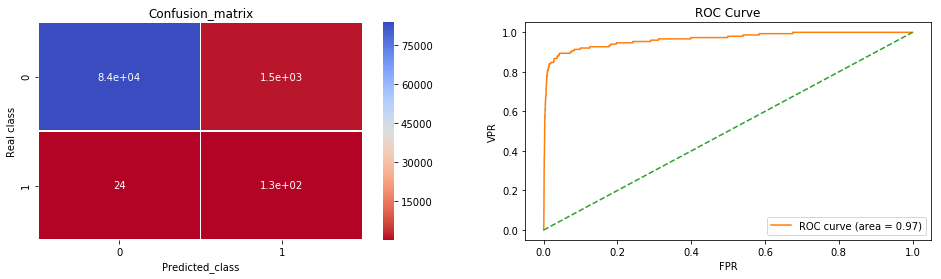


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85292
          1       0.08      0.84      0.14       151

avg / total       1.00      0.98      0.99     85443



The undersample data for 2 proportion

The normal transaction proportion is :  0.6666666666666666
The fraud transaction proportion is :  0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data:  716
Length of test data:  307
The recall for this model is:  0.728070175439
TP:  83
TN:  191
FP:  2
FN:  31


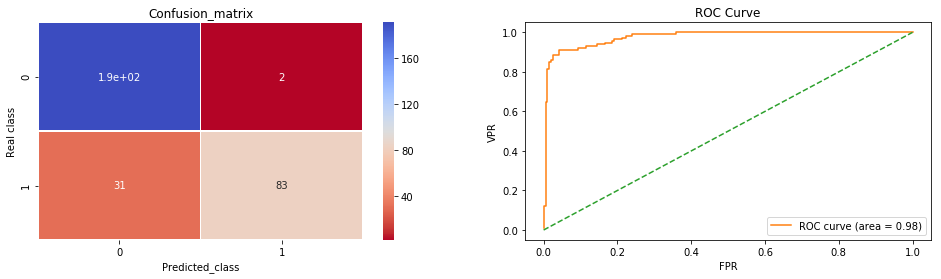


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.86      0.99      0.92       193
          1       0.98      0.73      0.83       114

avg / total       0.90      0.89      0.89       307

--------------------------Testing Set---------------------------
The recall for this model is:  0.794701986755
TP:  120
TN:  84808
FP:  484
FN:  31


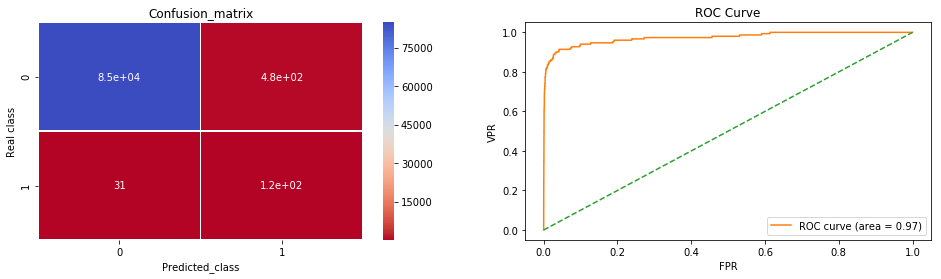


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85292
          1       0.20      0.79      0.32       151

avg / total       1.00      0.99      1.00     85443



The undersample data for 3 proportion

The normal transaction proportion is :  0.75
The fraud transaction proportion is :  0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data:  954
Length of test data:  410
The recall for this model is:  0.693069306931
TP:  70
TN:  305
FP:  4
FN:  31


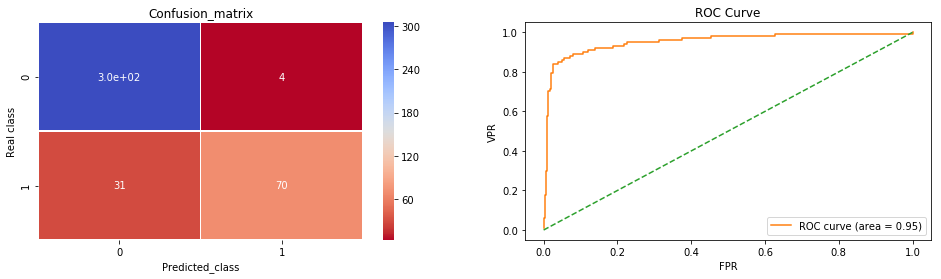


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.91      0.99      0.95       309
          1       0.95      0.69      0.80       101

avg / total       0.92      0.91      0.91       410

--------------------------Testing Set---------------------------
The recall for this model is:  0.788079470199
TP:  119
TN:  84523
FP:  769
FN:  32


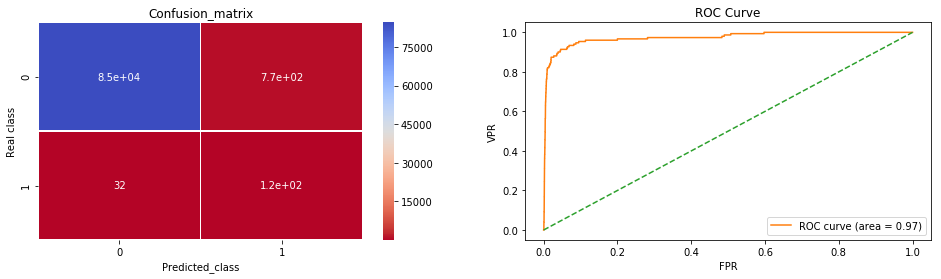


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85292
          1       0.13      0.79      0.23       151

avg / total       1.00      0.99      0.99     85443



In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print("================================================================\n\n")
    print("The undersample data for " + str(i) + " proportion\n")
    Undersample_data = undersample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LDA()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,under_x,x_ts,under_yx,y_ts)

Los resultados para ambos clasificadores (Logistic Regression y LDA) son similares, y sin validación estadística no se puede determinar cual tiene mejor desempeño, pero si se puede apreciar que para razones $n:1$, a medida que aumenta $n$, la precisión (y el puntaje $F_1$) aumenta para la clase 1 (fraude). Las curvas ROC son muy similares, con un área entre $0.97-0.99$ para los *validation set* y *test set*, por lo que no se puede concluir sobre ellas. Los mejores resultados se obtienen con razones distintas de $1:1$, es decir, con las clases desbalanceadas, pero no en la misma medida del conjunto original, en las que se observa una disminución considerable de los falsos positivos.

### g) Oversampling y SMOTE

De igual forma que la pregunta anterior, se utilizará oversamplig para balancear las clases, con clasificadores Logistic Regression y LDA. La función que realiza el oversampling es la siguiente. Esta vez, como la clase 1 tiene menos entradas que la clase 0, se permite el reemplazo en la función *random_choice*, que genera la muestra aleatoria.

#### Logistic Regression

In [10]:
def oversample(data,times):
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    Fraud_indices_oversample = np.array(np.random.choice(fraud_indices, 
                                                           (times*Count_Normal_transacation),replace=True))
    oversample_data= np.concatenate([normal_indices,Fraud_indices_oversample])
    oversample_data = data.iloc[oversample_data,:]
    normal = (float(len(oversample_data[oversample_data.Class==0]))
              /len(oversample_data["Class"]))
    print("The normal transaction proportion is : ", normal)
    fraud = (float(len(oversample_data[oversample_data.Class==1])) 
             /len(oversample_data["Class"]))
    print("The fraud transaction proportion is : ", fraud)
    return(oversample_data)

Length of training data:  199364
Length of test data:  85443


The oversample data for 1 proportion

The normal transaction proportion is :  0.5
The fraud transaction proportion is :  0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data:  278619
Length of test data:  119409
The recall for this model is:  0.917162348355
TP:  54584
TN:  58270
FP:  1625
FN:  4930


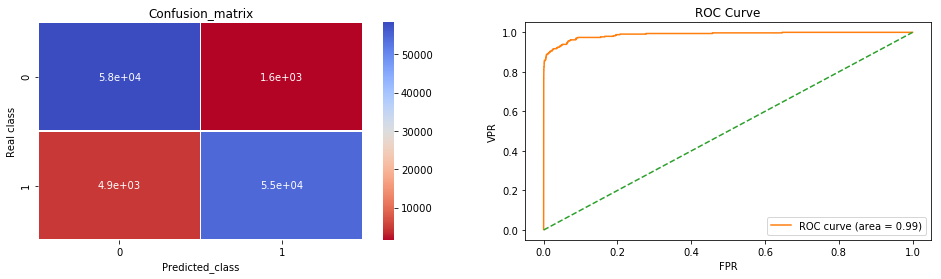


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.92      0.97      0.95     59895
          1       0.97      0.92      0.94     59514

avg / total       0.95      0.95      0.95    119409

--------------------------Testing Set---------------------------
The recall for this model is:  0.943661971831
TP:  134
TN:  82885
FP:  2416
FN:  8


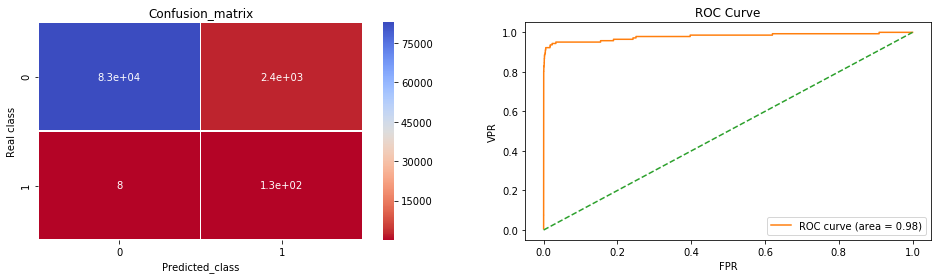


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85301
          1       0.05      0.94      0.10       142

avg / total       1.00      0.97      0.98     85443



The oversample data for 2 proportion

The normal transaction proportion is :  0.3333333333333333
The fraud transaction proportion is :  0.6666666666666666

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data:  417929
Length of test data:  179113
The recall for this model is:  0.940374015253
TP:  112086
TN:  56687
FP:  3233
FN:  7107


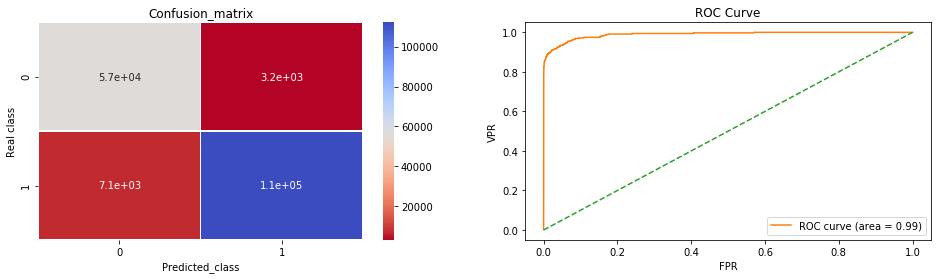


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.89      0.95      0.92     59920
          1       0.97      0.94      0.96    119193

avg / total       0.94      0.94      0.94    179113

--------------------------Testing Set---------------------------
The recall for this model is:  0.950704225352
TP:  135
TN:  80644
FP:  4657
FN:  7


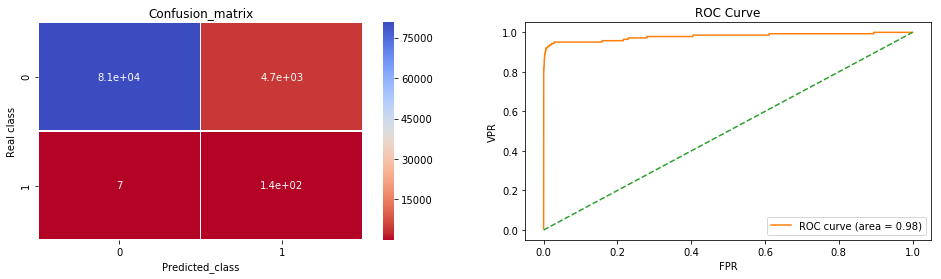


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.95      0.97     85301
          1       0.03      0.95      0.05       142

avg / total       1.00      0.95      0.97     85443



The oversample data for 3 proportion

The normal transaction proportion is :  0.25
The fraud transaction proportion is :  0.75

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data:  557239
Length of test data:  238817
The recall for this model is:  0.966752604706
TP:  172866
TN:  55185
FP:  4821
FN:  5945


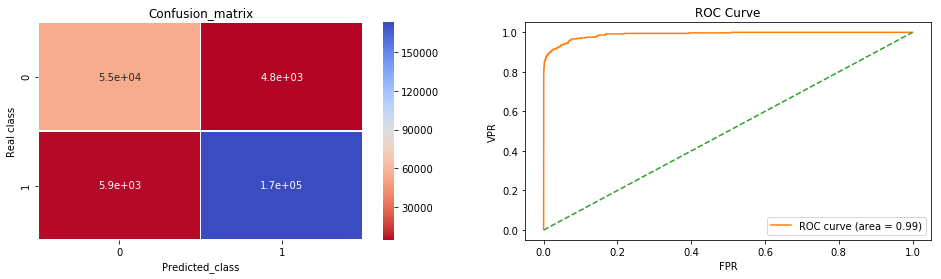


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.90      0.92      0.91     60006
          1       0.97      0.97      0.97    178811

avg / total       0.96      0.95      0.96    238817

--------------------------Testing Set---------------------------
The recall for this model is:  0.950704225352
TP:  135
TN:  78572
FP:  6729
FN:  7


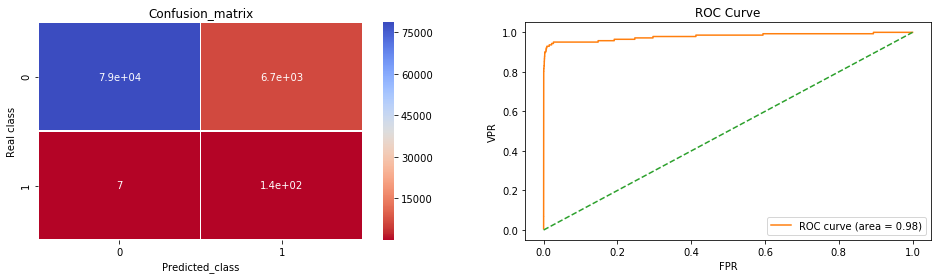


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.92      0.96     85301
          1       0.02      0.95      0.04       142

avg / total       1.00      0.92      0.96     85443



In [31]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print("================================================================\n\n")
    print("The oversample data for " + str(i) + " proportion\n")
    Oversample_data = oversample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    over_x,over_xt,over_yx,over_yxt=data_prepration(Oversample_data)
    clf=LogisticRegression()
    model(clf,over_x,over_xt,over_yx,over_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,over_x,x_ts,over_yx,y_ts)

#### LDA

Length of training data:  199364
Length of test data:  85443


The oversample data for 1 proportion

The normal transaction proportion is :  0.5
The fraud transaction proportion is :  0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data:  278635
Length of test data:  119415
The recall for this model is:  0.852812615581
TP:  50727
TN:  59257
FP:  676
FN:  8755


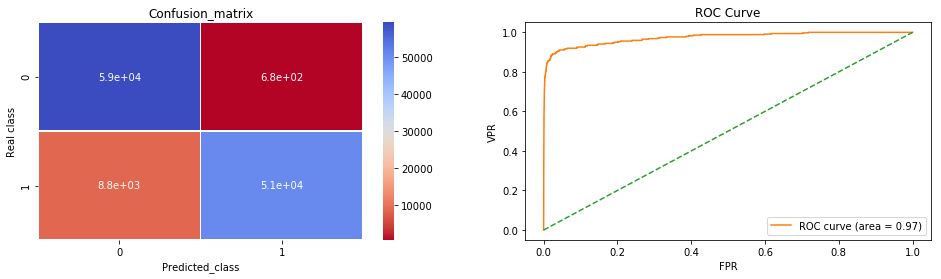


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.87      0.99      0.93     59933
          1       0.99      0.85      0.91     59482

avg / total       0.93      0.92      0.92    119415

--------------------------Testing Set---------------------------
The recall for this model is:  0.83660130719
TP:  128
TN:  84333
FP:  957
FN:  25


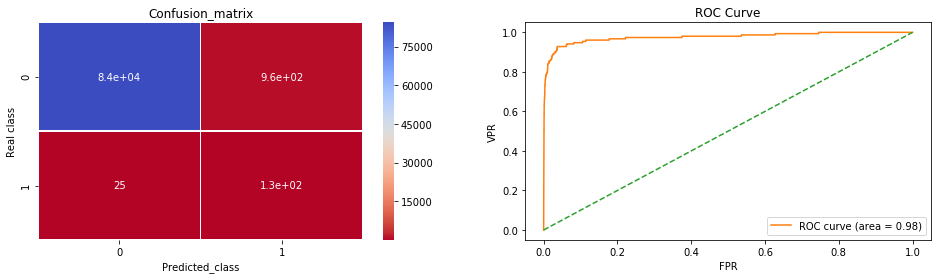


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85290
          1       0.12      0.84      0.21       153

avg / total       1.00      0.99      0.99     85443



The oversample data for 2 proportion

The normal transaction proportion is :  0.3333333333333333
The fraud transaction proportion is :  0.6666666666666666

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data:  417952
Length of test data:  179123
The recall for this model is:  0.900046820394
TP:  107651
TN:  55696
FP:  3821
FN:  11955


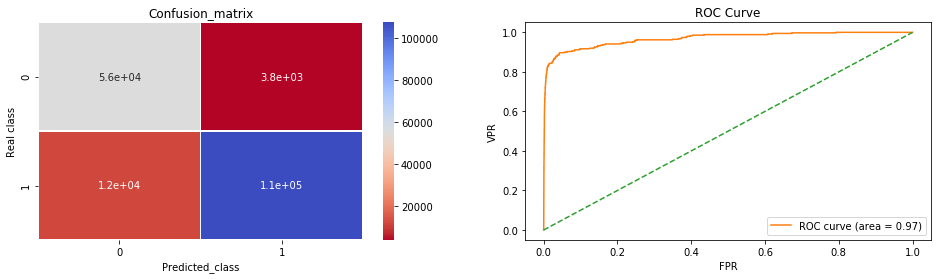


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.82      0.94      0.88     59517
          1       0.97      0.90      0.93    119606

avg / total       0.92      0.91      0.91    179123

--------------------------Testing Set---------------------------
The recall for this model is:  0.901960784314
TP:  138
TN:  79628
FP:  5662
FN:  15


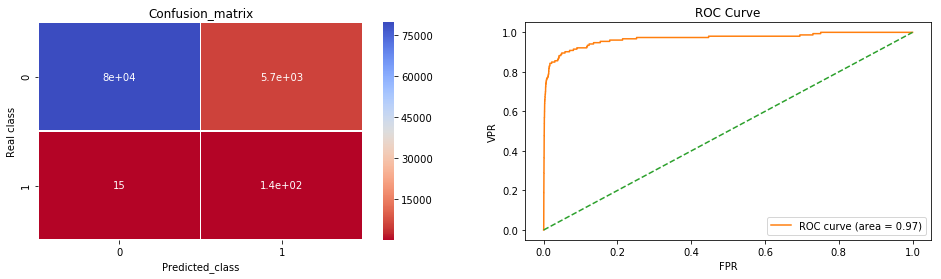


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.93      0.97     85290
          1       0.02      0.90      0.05       153

avg / total       1.00      0.93      0.96     85443



The oversample data for 3 proportion

The normal transaction proportion is :  0.25
The fraud transaction proportion is :  0.75

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data:  557270
Length of test data:  238830
The recall for this model is:  0.926334495708
TP:  165762
TN:  49445
FP:  10441
FN:  13182


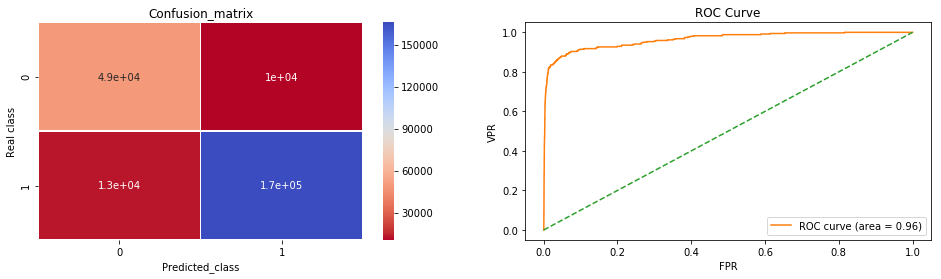


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.79      0.83      0.81     59886
          1       0.94      0.93      0.93    178944

avg / total       0.90      0.90      0.90    238830

--------------------------Testing Set---------------------------
The recall for this model is:  0.934640522876
TP:  143
TN:  70520
FP:  14770
FN:  10


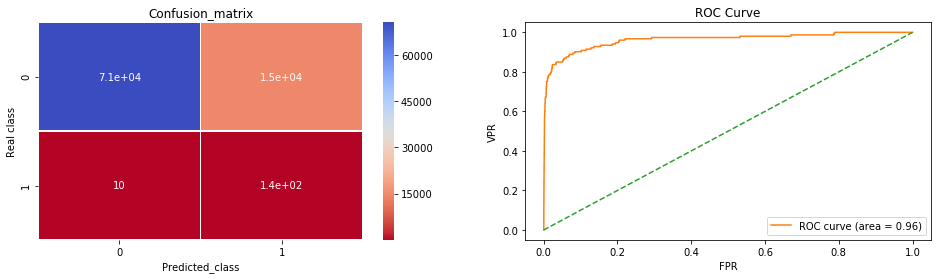


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.83      0.91     85290
          1       0.01      0.93      0.02       153

avg / total       1.00      0.83      0.90     85443



In [12]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print("================================================================\n\n")
    print("The oversample data for " + str(i) + " proportion\n")
    Oversample_data = oversample(x_tr,i)
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for " + str(i) + " proportion\n")
    over_x,over_xt,over_yx,over_yxt=data_prepration(Oversample_data)
    clf=LDA()
    model(clf,over_x,over_xt,over_yx,over_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,over_x,x_ts,over_yx,y_ts)

A diferencia de undersampling, cuando se usa regresión logística y LDA, no se observa disminución de los falsos positivos a medida que aumenta la proporción para $n:1$. Al contrario, la capacidad de detectar la clase 1 se deteriora con el desbalance de las clases en el oversampling. En general, undersampling obtuvo mejores resultados, usando clases desbalancedas ($2:1$, $3:1$) para ambos clasificadores. 

### Smote

A continuación se usará la técnica SMOTE para realizar el oversampling, usando los $k$ vecinos más cercanos para construir las muestras sintéticas. Los valores de $k$ serán $[1,2,5,10]$.

In [11]:
from imblearn.over_sampling import SMOTE

Length of training data:  199364
Length of test data:  85443


The SMOTE oversample data for k = 1 and 1:1 proportion


----------------------Validation Set------------------------

The model classification for 1 proportion

The recall for this model is:  0.9288592188
TP:  55099
TN:  58549
FP:  1537
FN:  4220


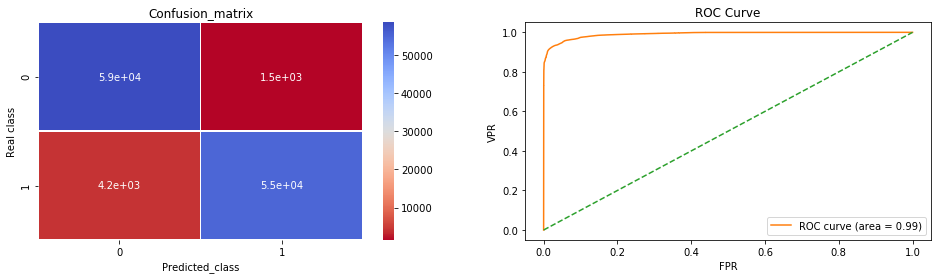


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     60086
          1       0.97      0.93      0.95     59319

avg / total       0.95      0.95      0.95    119405

--------------------------Testing Set---------------------------
The recall for this model is:  0.904411764706
TP:  123
TN:  83187
FP:  2120
FN:  13


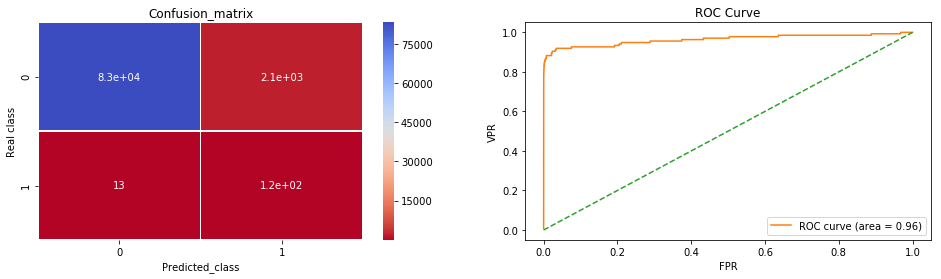


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85307
          1       0.05      0.90      0.10       136

avg / total       1.00      0.98      0.99     85443



The SMOTE oversample data for k = 2 and 1:1 proportion


----------------------Validation Set------------------------

The model classification for 1 proportion

The recall for this model is:  0.929639814877
TP:  55440
TN:  58375
FP:  1394
FN:  4196


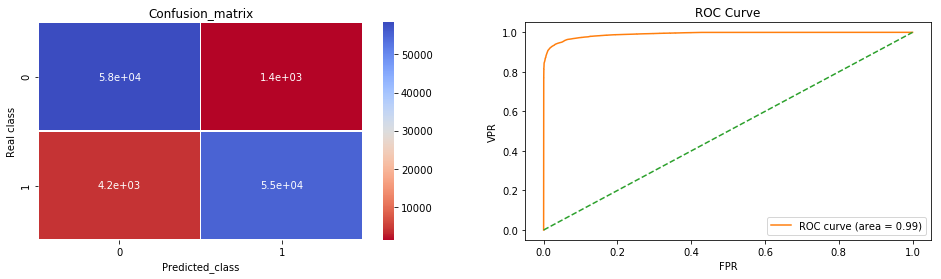


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     59769
          1       0.98      0.93      0.95     59636

avg / total       0.95      0.95      0.95    119405

--------------------------Testing Set---------------------------
The recall for this model is:  0.897058823529
TP:  122
TN:  83265
FP:  2042
FN:  14


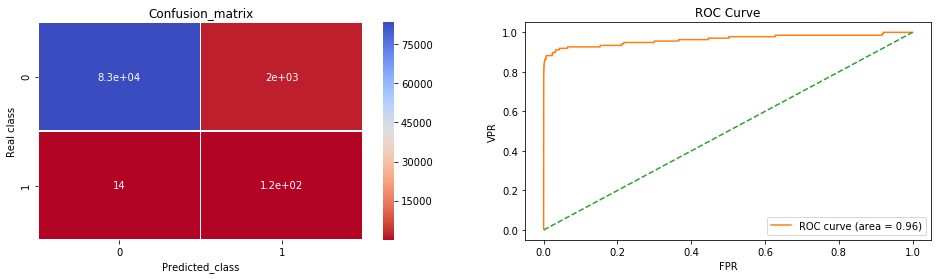


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85307
          1       0.06      0.90      0.11       136

avg / total       1.00      0.98      0.99     85443



The SMOTE oversample data for k = 5 and 1:1 proportion


----------------------Validation Set------------------------

The model classification for 1 proportion

The recall for this model is:  0.930666756375
TP:  55330
TN:  58394
FP:  1559
FN:  4122


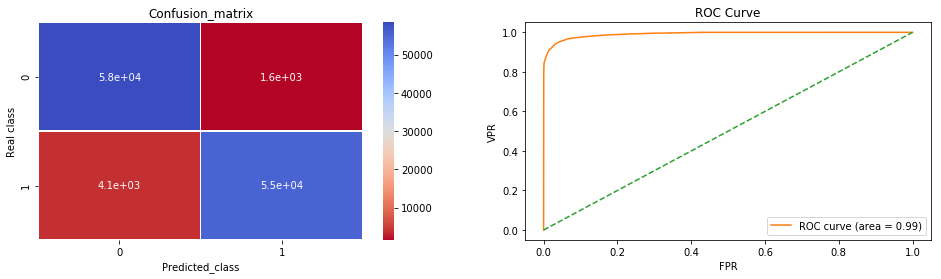


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     59953
          1       0.97      0.93      0.95     59452

avg / total       0.95      0.95      0.95    119405

--------------------------Testing Set---------------------------
The recall for this model is:  0.889705882353
TP:  121
TN:  83173
FP:  2134
FN:  15


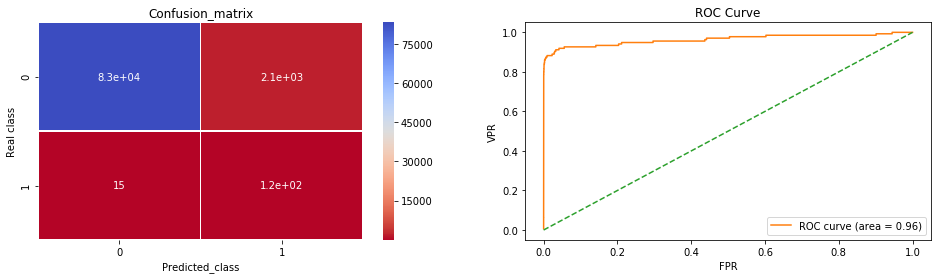


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85307
          1       0.05      0.89      0.10       136

avg / total       1.00      0.97      0.99     85443



The SMOTE oversample data for k = 10 and 1:1 proportion


----------------------Validation Set------------------------

The model classification for 1 proportion

The recall for this model is:  0.931564782776
TP:  55729
TN:  58075
FP:  1507
FN:  4094


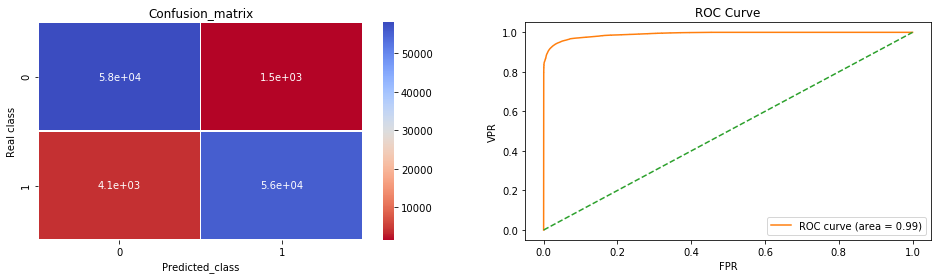


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     59582
          1       0.97      0.93      0.95     59823

avg / total       0.95      0.95      0.95    119405

--------------------------Testing Set---------------------------
The recall for this model is:  0.889705882353
TP:  121
TN:  83230
FP:  2077
FN:  15


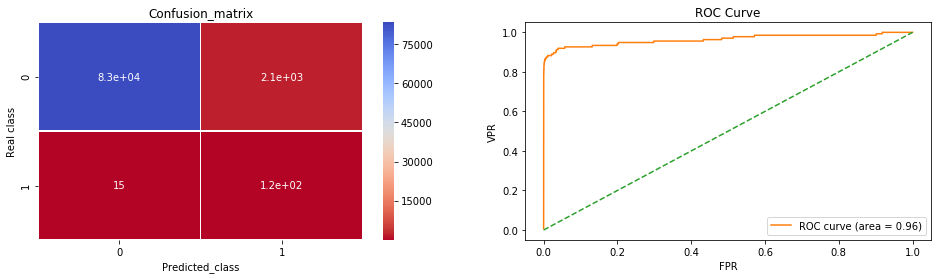


----------Classification Report---------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85307
          1       0.06      0.89      0.10       136

avg / total       1.00      0.98      0.99     85443



In [24]:
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
for k in [1,2,5,10]:
    print("================================================================\n\n")
    print("The SMOTE oversample data for k = " + str(k) + " and 1:1 proportion\n")
    sm = SMOTE(k_neighbors=k)
    oversample_x, oversample_y = sm.fit_sample(x_tr, y_tr.values.ravel())
    print("\n----------------------Validation Set------------------------")
    print("\nThe model classification for 1 proportion\n")
    over_x,over_xt,over_yx,over_yxt= train_test_split(pd.DataFrame(oversample_x), pd.DataFrame(oversample_y), test_size=0.3)
    clf=LogisticRegression()
    model(clf,over_x,over_xt,over_yx,over_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf,over_x,x_ts,over_yx,y_ts)

Los resultados son similares al oversampling anterior, obteniendo los mejores resultados para $k = 5$. Al menos para esta dataset, SMOTE no parece tener un mejor desempeño que el oversampling tradicional, con los falsos positivos disminuyendo muy levemente a medida que $k$ aumenta.